## Aishwarya Walkar
### Data Science and Business Analytics Intern @ The Sparks Foundation
#### Topic : Prediction using Unsupervised ML
#### Dataset : [https://bit.ly/3kXTdox] (Iris data set :predict the optimum number of clusters
#### and represent it visually)

In [3]:
#Unsupervised Machine Learning - Clustering(Iris DataSet):
#To predict the optimum number of clusters and represent it visually for the given Iris data set.

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [3]:
# Load the iris dataset
df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# To know number of rows and collumns in iris data set
df.shape

(150, 4)

In [5]:
# To find if any null value is present in iris dataset
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
# To see summary statistics of Iris dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


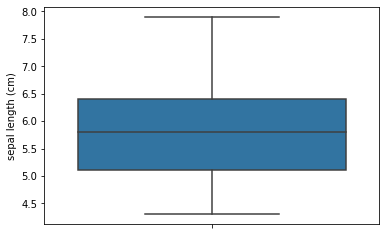

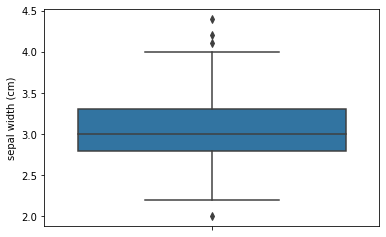

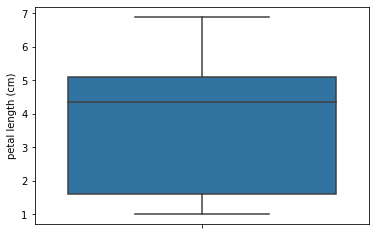

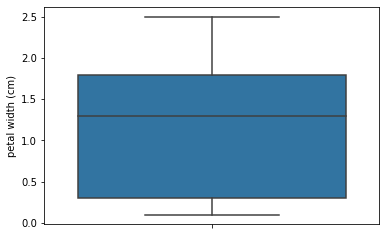

In [7]:
# To find outliers from Iris dataset
cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

#From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'

In [8]:
# To remove outliers from 'sepal width (cm)' iris dataset
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 4)

#We can see that after outlier treatment the number of roes are reduced to 146 from 150

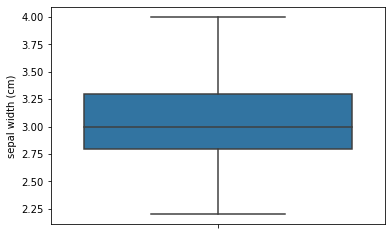

In [9]:
# Boxplot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

In [10]:
# Standardizing to avoid bias
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df)

In [11]:
#To find the optimal no. of cluster

from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df_norm)
    
    
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_cluster,cluster_errors
0,1,584.000000
1,2,217.499302
2,3,134.345832
3,4,109.767399
4,5,88.965933
5,6,77.731235
6,7,67.999752
7,8,59.831110
8,9,52.460111
9,10,47.984943


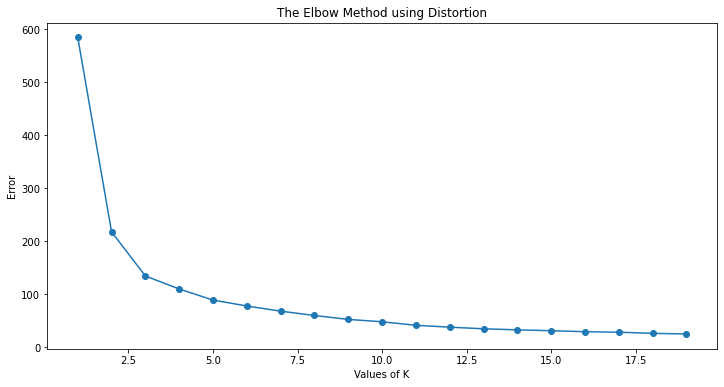

In [12]:
#Ploting elbow curve or sree to find the no. of cluster
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [13]:
# Creating object of the model and fitting it
model = KMeans(n_clusters=3, max_iter=50)
model.fit(df)

KMeans(max_iter=50, n_clusters=3)

In [14]:
#Analysis of Cluster found

df.index = pd.RangeIndex(len(df.index))
df_km = pd.concat([df, pd.Series(model.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']
km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))


In [15]:
df2 = pd.concat([pd.Series([0,1,2]), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth
                ], axis=1)
df2

,0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,4.976596,3.376596,1.461702,0.246809
1,1,6.850000,3.073684,5.742105,2.071053
2,2,5.916393,2.760656,4.408197,1.440984


In [16]:
df2.head()

,0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,4.976596,3.376596,1.461702,0.246809
1,1,6.850000,3.073684,5.742105,2.071053
2,2,5.916393,2.760656,4.408197,1.440984


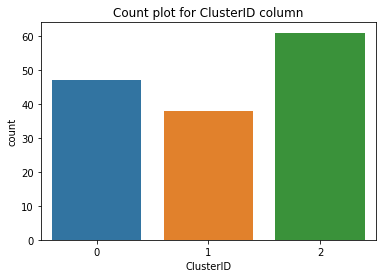

In [17]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

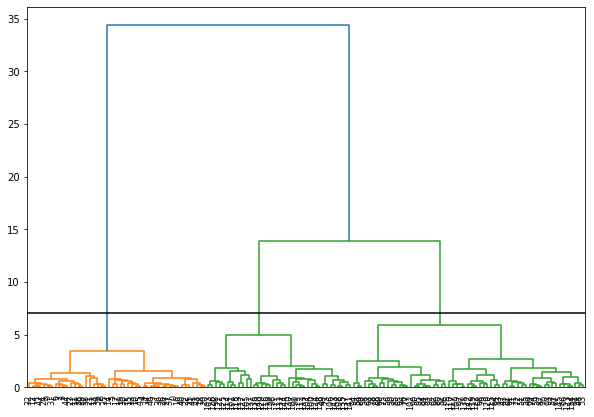

In [18]:
#heirarchical clustering with full dendrogram
plt.figure(figsize=(10,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

# set cut-off to 50
max_d = 7.08    # max_d as in max_distance
dendrogram(mergings,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=150,                  # Try changing values of p
           leaf_rotation=90.,      # rotates the x axis labels
           leaf_font_size=8.,      # font size for the x axis labels
          )

plt.axhline(y=max_d, c='k')
plt.show()

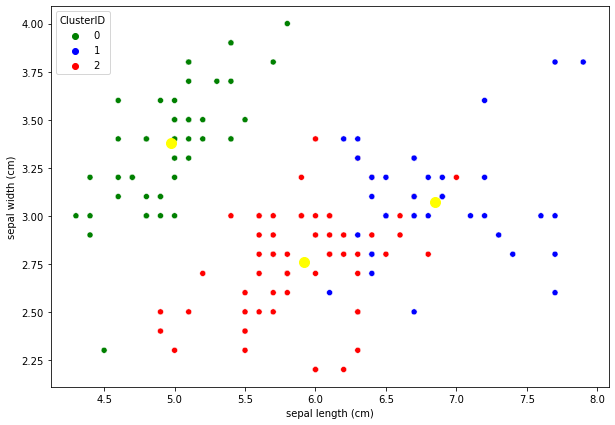

In [24]:
# Scatter plot to visualize the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=df_km, hue='ClusterID', palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()


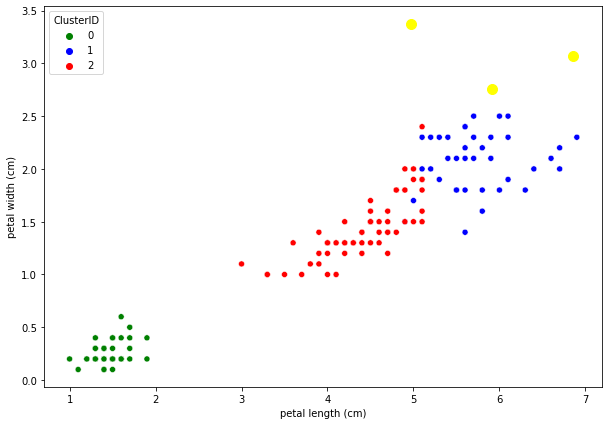

In [20]:
# Scatter plot to visualize the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x='petal length (cm)',y='petal width (cm)', data=df_km, hue='ClusterID', palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()
